**OpenViSUS: read from a remote dataset**


In [2]:
import os,sys
import math
import matplotlib.pyplot as plt
import numpy

from ipywidgets import *

from OpenVisus import *

In [3]:
DbModule.attach()

PythonEngine is working fine


In [5]:
dataset=LoadDataset("http://atlantis.sci.utah.edu/mod_visus?dataset=BlueMarble")
    
# in 2D this means more or less a 2048x1024 image in power-2 logic box
resolution=21 

def readData(
    time=dataset.getDefaultTime(),
    field=dataset.getDefaultField(),
    logic_box=dataset.getLogicBox(),
    resolution=resolution):
    
    access=dataset.createAccess()
    query=BoxQuery(dataset, field, time,ord('r'))
    query.logic_box=logic_box
    query.end_resolutions.push_back(resolution)
    dataset.beginQuery(query)
    dataset.executeQuery(access,query)

    data=Array.toNumPy(query.buffer,bSqueeze=True,bShareMem=False)
    return data

def showData(data):
    fig = plt.figure(figsize = (70,20))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(data, origin='lower')
    plt.show()


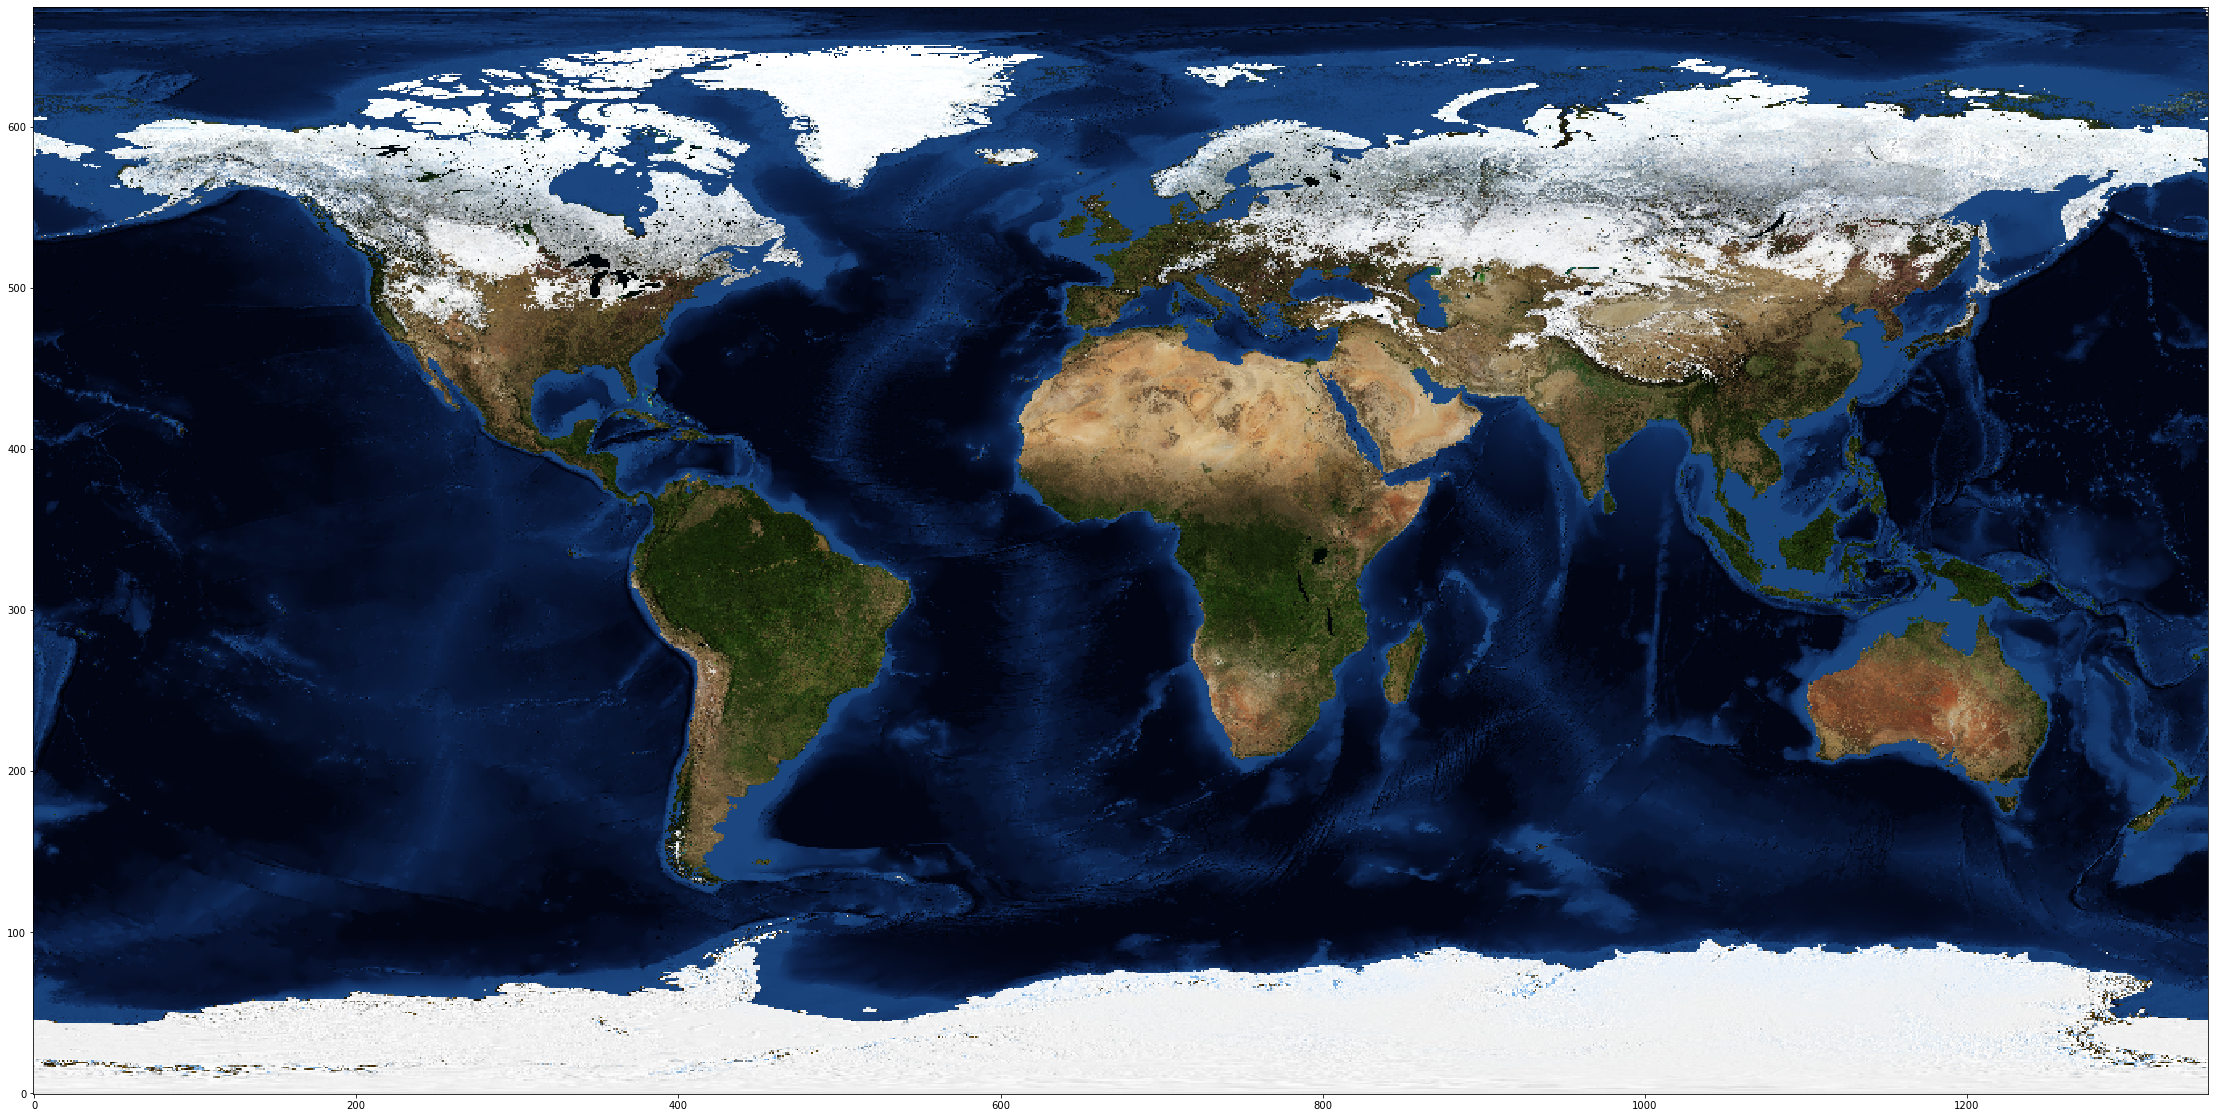

In [6]:
showData(readData(time=0))

In [7]:
interact(
    lambda time,resolution: showData(readData(time=time,resolution=resolution)),
    time=widgets.IntSlider(value=0,min=0,max=4,step=1), 
    resolution=widgets.IntSlider(value=9,min=1,max=dataset.getMaxResolution(),step=2))

interactive(children=(IntSlider(value=0, description='time', max=4), IntSlider(value=9, description='resolutio…

<function __main__.<lambda>(time, resolution)>